In [87]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [97]:
PATH = f'./data/attention/'
filename = 'results.npy'
skip_first = 20
embeddings = np.load(os.path.join(PATH, filename))
embeddings = embeddings[skip_first:]
print(embeddings.shape)

(978, 12)


In [98]:
name = 'hopper'

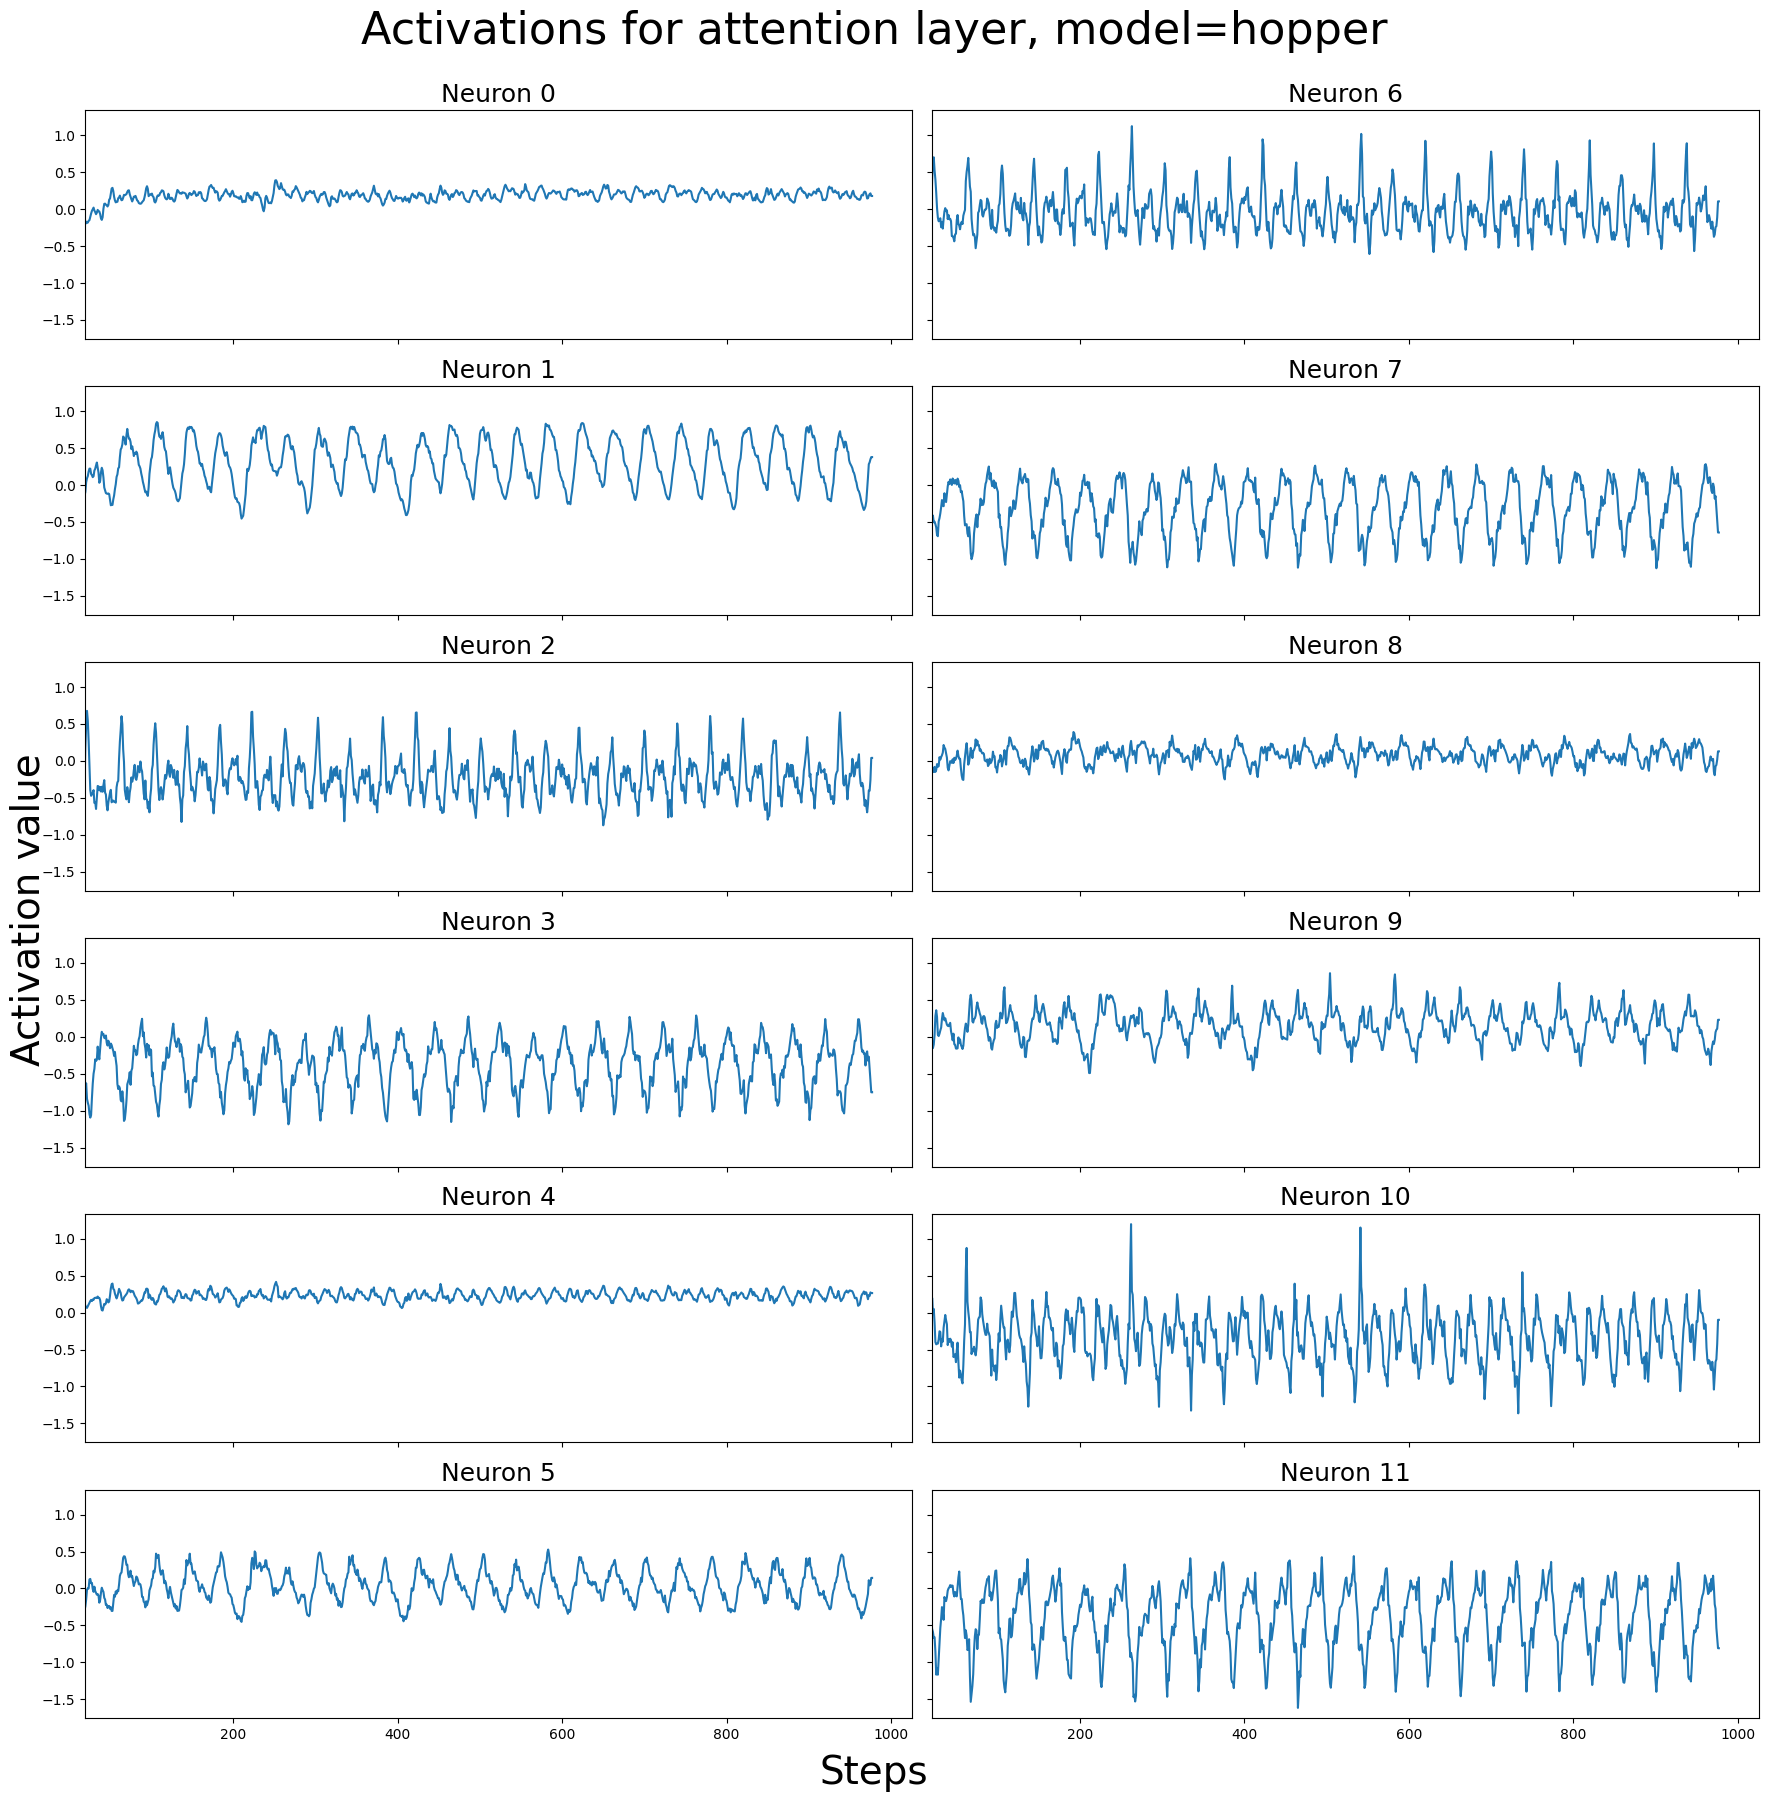

In [99]:
indices = range(embeddings.shape[1])
nrows = 8 if name == 'ant' else 6
ncols = embeddings.shape[1] // nrows
fig, axs = plt.subplots(nrows, ncols, sharex=True, sharey=True, figsize=(18,18), tight_layout=True)
fig.suptitle(f"Activations for attention layer, model={name}", fontsize=32, y=1)
fig.supxlabel("Steps", fontsize=28)
fig.supylabel("Activation value", fontsize=28)
for index in indices:
    ax = axs[index % nrows, index // nrows]
    ax.plot(range(embeddings.shape[0]), embeddings[:, index])
    ax.set_title(f"Neuron {index}", fontsize=18)
    ax.set_xlim(left=skip_first)

Text(0.5, 1.0, 'Mean attention value per neuron\nmodel=hopper')

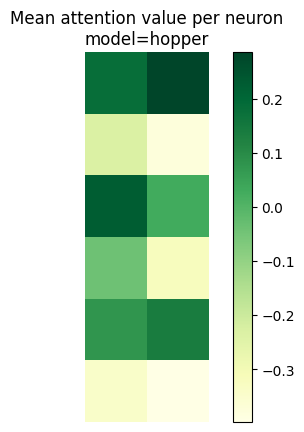

In [100]:
fig, axs = plt.subplots()
data = np.reshape(np.mean(embeddings, axis=0), (nrows, ncols))
img = axs.imshow(data, cmap='YlGn')
axs.axis('off')
plt.colorbar(img)
plt.title(f'Mean attention value per neuron\nmodel={name}')

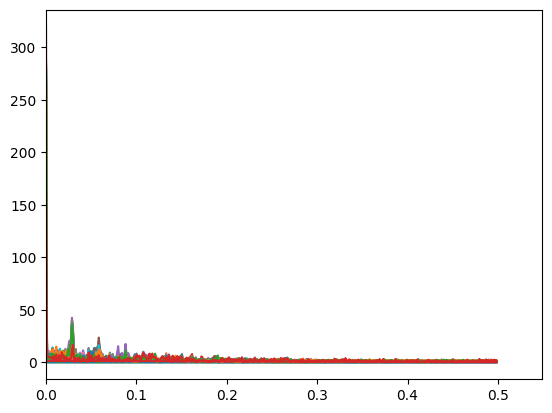

In [73]:
for index in indices:
    fourier = np.fft.fft(embeddings[:, index])
    freq = np.fft.fftfreq(embeddings.shape[0])
    plt.plot(freq, abs(fourier))
    plt.xlim(left=0)